In [1]:
import math
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df = pd.read_csv('./optimalturnrate_bysection_2017.csv', index_col=0)

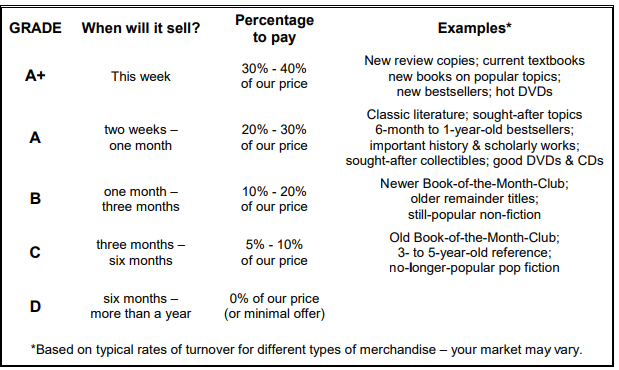

In [3]:
convert_grades_dict = {1: 'A', 2:'B', 3:'C', 4:'D', 5:'E'}

In [4]:
df['Grade'] = df['Grade'].map(convert_grades_dict)

In [5]:
df['Days_Salable_Scanned'] = df['Days_Salable'].astype(int)

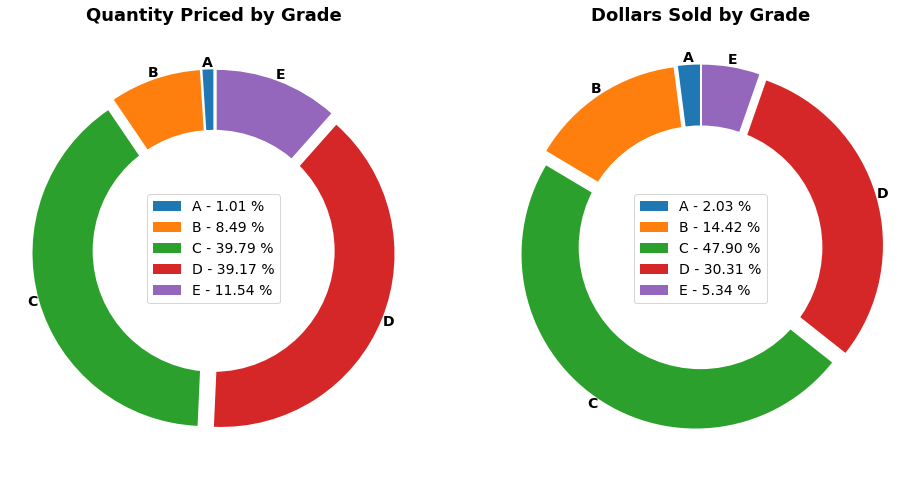

In [6]:
## Set up common elements
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

## Set up pie chart of all items priced
pie_all = df.groupby('Grade').sum()['qty_Priced']
explode_all = [0.05 for n in df.groupby('Grade').sum()['qty_Priced']]

pcts_all = 100.*pie_all/df['qty_Priced'].sum()


patches_all, text_all= ax1.pie(pie_all,
                               explode = explode_all, 
                               labels = pie_all.index,
                               labeldistance = 1.04,
                               radius = 1,
                               startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')

for t in text_all:
    t.set_fontsize(14)
    t.set_fontweight('bold')
    t.set_horizontalalignment('center')
    
labels_all = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_all.index, pcts_all)]

ax1.add_artist(centre_circle)
ax1.axis('equal')
ax1.legend(patches_all, labels_all, loc='center', fontsize=14)


ax1.title.set_position([.5, 1.01])
ax1.set_title('Quantity Priced by Grade', fontsize=18, fontweight='bold')

# ax1.legend(patches_all, labels_all, loc='center left', bbox_to_anchor=(-0.1, 1.),
#            fontsize=14)


## Set up pie chart of dollars from items sold
pie_sold = df.groupby('Grade').sum()['amt_Sold']
explode_sold = [0.05 for n in df.groupby('Grade').sum()['amt_Sold']]

pcts_sold = 100.*pie_sold/df['amt_Sold'].sum()


patches_sold, text_sold= ax2.pie(pie_sold,
                                 explode = explode_sold, 
                                 labels = pie_sold.index,
                                 labeldistance = 1.04,
                                 radius = 1,
                                 startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')

for t in text_sold:
    t.set_fontsize(14)
    t.set_fontweight('bold')
    t.set_horizontalalignment('center')

labels_sold = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_sold.index, pcts_sold)]

ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.legend(patches_sold, labels_sold, loc='center', fontsize=14)

ax2.title.set_position([.5, 1.01])
ax2.set_title('Dollars Sold by Grade', fontsize=18, fontweight='bold')

plt.show()

In [7]:
pd.set_option('display.max_rows', 500)
df.groupby('Section').sum().sort_values('qty_Priced', ascending=False)

,Days_Salable,qty_Priced,qty_Sold,amt_Sold,Days_Salable_Scanned
Section,,,,,
DVDs,552884.0,2585988,2029348,14692150.87,552884
Fiction / Literature,562938.0,2379785,1596225,9429264.11,562938
Teen / Young Adult,546399.0,1905980,1445542,6892179.26,546399
Store Front,536137.0,1584450,1131327,6993317.10,536137
Childrens,563324.0,1568605,1099220,4237913.45,563324
Mystery,508557.0,1074714,738328,4143168.25,508557
History,514384.0,939313,636568,4697309.71,514384
CDs,503785.0,930268,711839,4103570.83,503785
Religion,507015.0,880468,578094,4357396.59,507015


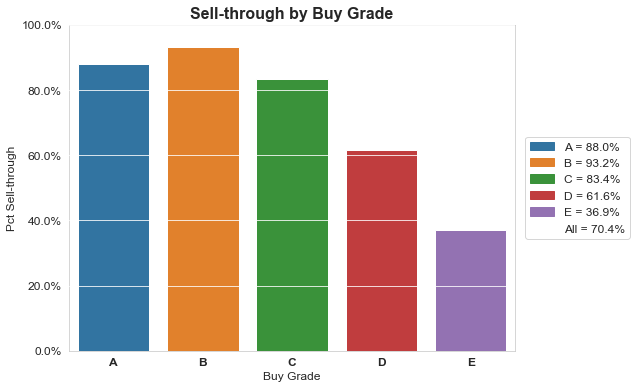

In [8]:
sns.set_style('whitegrid')
st_barplot_df = (df.groupby('Grade')['qty_Sold'].sum()/df.groupby('Grade')['qty_Priced'].sum())
st_barplot_df= st_barplot_df.reset_index()
st_barplot_df.columns = ['Grade', 'ST']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='ST', data=st_barplot_df, ax=ax)


ax.set_ylim([0,1])

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Pct Sell-through', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Sell-through by Buy Grade', fontsize=16, fontweight='bold')

legend_total = df['qty_Sold'].sum()/df['qty_Priced'].sum()
legend_labels = ['{0} = {1:.1%}'.format(v[0], v[1]) for (i, v) in st_barplot_df.iterrows()] \
                + ['All = {:.1%}'.format(legend_total)]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)


plt.show()

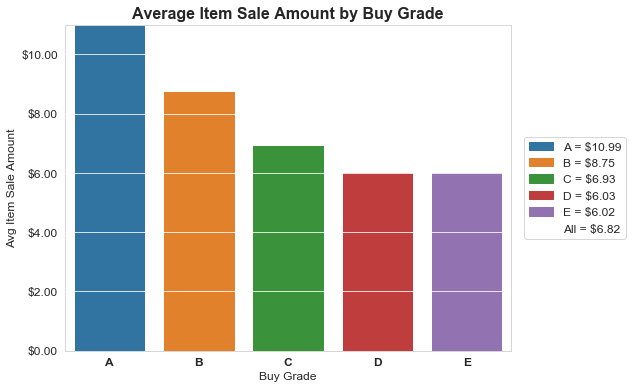

In [ ]:
sns.set_style('whitegrid')
amt_barplot_df = df.groupby('Grade')['amt_Sold'].sum()/df.groupby('Grade')['qty_Sold'].sum()
amt_barplot_df= amt_barplot_df.reset_index()
amt_barplot_df.columns = ['Grade', 'AvgAmt']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='AvgAmt', data=amt_barplot_df, ax=ax)

ax.set_ylim([0, math.ceil(amt_barplot_df['AvgAmt'].max())])
# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.2f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Avg Item Sale Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Average Item Sale Amount by Buy Grade', fontsize=16, fontweight='bold')

legend_total = df['amt_Sold'].sum()/df['qty_Sold'].sum()
legend_labels = ['{0} = ${1:.2f}'.format(v[0], v[1]) for (i, v) in amt_barplot_df.iterrows()] \
                + ['All = ${:.2f}'.format(legend_total)]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)
plt.show()

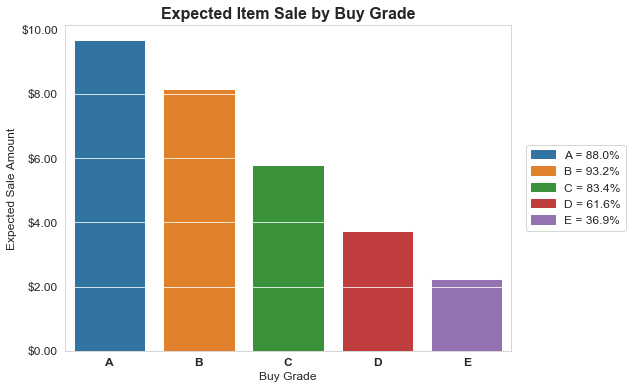

In [ ]:
sns.set_style('whitegrid')
ev_barplot_df = (df.groupby('Grade')['qty_Sold'].sum()/df.groupby('Grade')['qty_Priced'].sum() *
                df.groupby('Grade')['amt_Sold'].sum()/df.groupby('Grade')['qty_Sold'].sum())
ev_barplot_df= ev_barplot_df.reset_index()
ev_barplot_df.columns = ['Grade', 'EV']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='EV', data=ev_barplot_df, ax=ax)



# Get y tick values and reformat them as dollar amounts
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.2f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Expected Sale Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Expected Item Sale by Buy Grade', fontsize=16, fontweight='bold')

legend_labels = ['{0} = {1:.1%}'.format(v[0], v[1]) for (i, v) in st_barplot_df.iterrows()] 
legend_colors = [p.get_facecolor() for p in ax.patches]
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)


plt.show()

In [ ]:
ev_barplot_df

,Grade,EV
0,A,9.666098
1,B,8.158122
2,C,5.779790
3,D,3.715010
4,E,2.222095


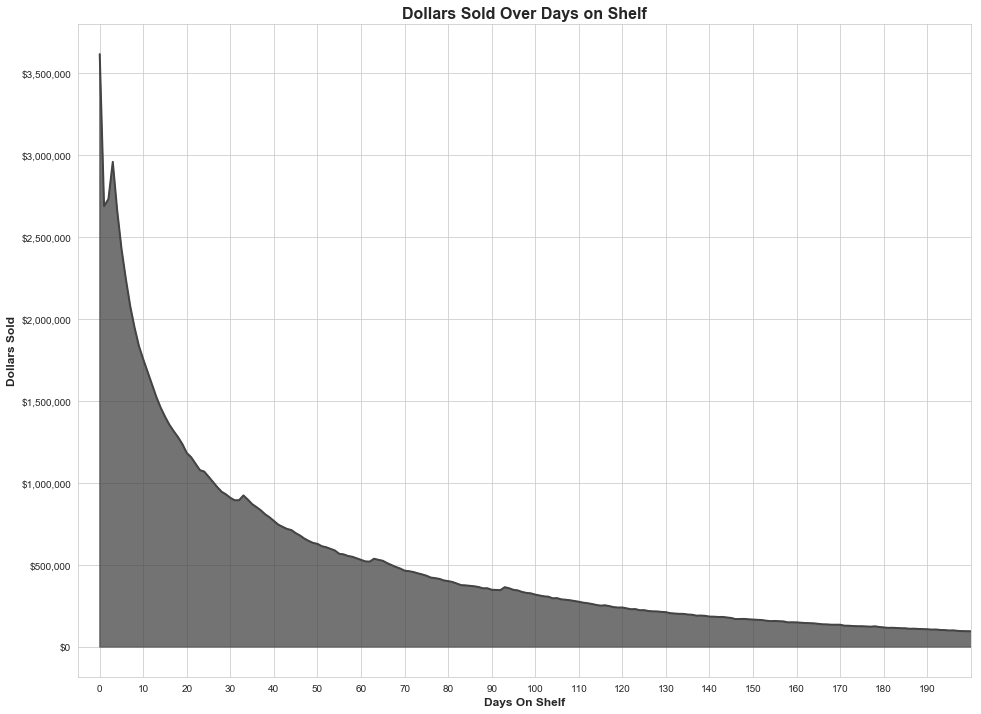

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
ax.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_Sold'], linewidth=2, color='#444444')
ax.fill_between(plt_df['Days_Salable_Scanned'], plt_df['amt_Sold'], color='#444444', alpha=0.75)
ax.set_xlim([-5,200])
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 200, 10))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')
ax.set_title('Dollars Sold Over Days on Shelf', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
def annot_text(t, xt, yt, ax=None, x=3, y=150, **kwargs):
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data',textcoords="offset points",
              bbox=bbox_props, ha="left", va="bottom", fontsize=14)
    ax.annotate(t, xy=(x, y), xytext=(xt,yt), **kw)

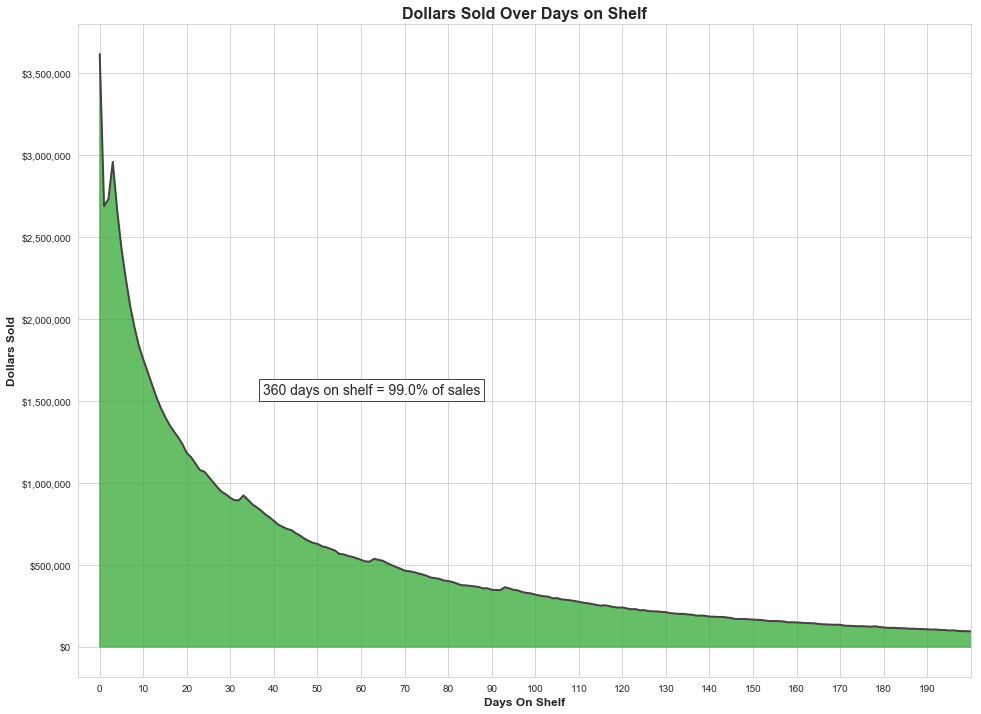

In [ ]:
day_lim = 360
plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
filt = plt_df['Days_Salable_Scanned'] >= day_lim
ffilt = plt_df['Days_Salable_Scanned'] <= day_lim

fig, ax = plt.subplots(figsize=(16,12))
ax.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_Sold'], linewidth=2, color='#444444')

ax.fill_between(plt_df[filt]['Days_Salable_Scanned'], plt_df[filt]['amt_Sold'], color='#444444', alpha=0.75)
ax.fill_between(plt_df[ffilt]['Days_Salable_Scanned'], plt_df[ffilt]['amt_Sold'], color='#33aa33', alpha=0.75)

ax.set_xlim([-5,200])
yvals = ax.get_yticks()

ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 200, 10))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')
ax.set_title('Dollars Sold Over Days on Shelf', fontsize=16, fontweight='bold')


sales_pct = 1-plt_df[filt]['amt_Sold'].sum()/plt_df['amt_Sold'].sum()

sales_text = '{} days on shelf = {:.1%} of sales'.format(day_lim, sales_pct)
annot_text(sales_text, 150, 250)
#ax.axvline(x=84, color='black', linestyle = '--')
plt.show()

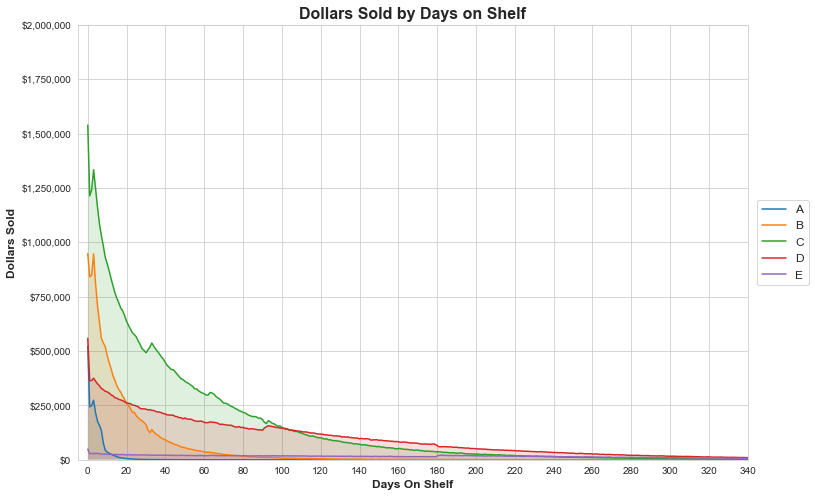

In [ ]:
cmap = sns.color_palette()

lineplot_df = df.groupby(by=['Grade','Days_Salable_Scanned']).sum()
lineplot_df = lineplot_df.reset_index()

grade_list = lineplot_df['Grade'].unique()

cnum = 0
fig, ax = plt.subplots(figsize=(12,8))

for g in grade_list:
    grade_filt = lineplot_df['Grade'] == g
    
    color = cmap[cnum]
    cnum += 1

    ax.plot(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
            lineplot_df[grade_filt]['amt_Sold'], color=color, label=g)
    
    ax.fill_between(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
                    lineplot_df[grade_filt]['amt_Sold'], facecolor=color, alpha=0.15)
    
    ax.set_xlim([-5,200])
    ax.set_ylim([0,2e6])

    # Get y tick values and reformat them as percentages
    yvals = ax.get_yticks()
    ax.set_xticks(np.arange(0,360,20))
    ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])

    # Set axis labels and format text
    ax.set_xlabel('Days On Shelf', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')

    # Set plot title and format text
    ax.set_title('Dollars Sold by Days on Shelf', fontsize=16, fontweight='bold')
    
    ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=12)

    fn = 'dollars_sold_grade' + g +'.png'
    plt.savefig(fn, pad_inches=0.2, frameon=False)
    
plt.show()

In [ ]:
# Take out poorly defined or mostly inactive sections
filt_dropsections = df['Section'].isin(['Backroom', 'Main Display', 'Clearance', 'Other', 'Books On Tape'])
plt_df = df.drop(df[filt_dropsections].index, axis=0)

In [ ]:
# Calculate average sale per item
plt_df['avg_AmtSold'] = plt_df['amt_Sold']/plt_df['qty_Sold']

In [ ]:
# Create section filters
num_sections = 5
list_all_sections = list(plt_df.groupby(['Section']).sum().sort_values('amt_Sold', ascending=False).index)
list_top_sections = list(plt_df.groupby(['Section']).sum().sort_values('amt_Sold', ascending=False)[0:num_sections].index)
list_bot_sections = list(plt_df.groupby(['Section']).sum().sort_values('amt_Sold', ascending=False)[-(num_sections + 1):-1].index)

filt_topsect = plt_df['Section'].isin(list_top_sections)

In [ ]:
pd.options.display.max_rows = 9999

In [ ]:
max_days = 365

df_allgrades = plt_df.groupby(['Section','Days_Salable_Scanned']).sum().reset_index()
df_rota = pd.DataFrame(columns=['Section',
                                'amt_Sold', 
                                'qty_Sold', 
                                'qty_Priced', 
                                'avg_DaysOnShelf'], index=df_allgrades.index)


for i, v in df_allgrades.iterrows():
    rota_period = v['Days_Salable_Scanned'] + 1
    section = v['Section']
    rota_lt_filt = (df_allgrades['Days_Salable_Scanned'] < rota_period) & (df_allgrades['Section'] == section)
    rota_gt_filt = (df_allgrades['Days_Salable_Scanned'] >= rota_period) \
                    & (df_allgrades['Days_Salable_Scanned'] <= max_days) & (df_allgrades['Section'] == section)
    
    df_rota.at[i, 'Section'] = section
    df_rota.at[i, 'amt_Sold'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['amt_Sold'].sum() \
                            - df_allgrades[rota_gt_filt]['amt_Sold'].sum())
    
    df_rota.at[i, 'qty_Sold'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['qty_Sold'].sum() \
                            - df_allgrades[rota_gt_filt]['qty_Sold'].sum())
    
    df_rota.at[i, 'qty_Priced'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['qty_Priced'].sum())
    
    df_rota.at[i, 'avg_DaysOnShelf'] = (df_allgrades[rota_lt_filt]['qty_Priced'] *  
        df_allgrades[rota_lt_filt]['Days_Salable_Scanned']).sum() / df_allgrades[rota_lt_filt]['qty_Priced'].sum()

In [ ]:
df_rota['Days_Salable_Scanned'] = df_allgrades['Days_Salable_Scanned']

In [ ]:
def annot_graph(x,y, xt,yt, ax=None):
#     x=x.astype(float)
#     y=y.astype(float)
    text= "{:.0f} days, ${:,.2f}".format(x, y)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(facecolor='darkgrey', shrink=0.03)
    kw = dict(xycoords='data',textcoords="offset points",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", fontsize=12)
    ax.annotate(text, xy=(x, y), xytext=(xt,yt), **kw)

In [ ]:
# Rank sections by total sales, store in column in plt_df
list_SectionSalesRank = list(plt_df.groupby('Section').sum()\
                          .sort_values(['amt_Sold'], ascending = False).index.values)

dict_SectionSalesRank = dict(zip(list_SectionSalesRank, range(0,len(list_SectionSalesRank))))

plt_df['rank_SectionAmtSold'] = plt_df['Section'].map(dict_SectionSalesRank)
df_rota['rank_SectionAmtSold'] = df_rota['Section'].map(dict_SectionSalesRank)

In [ ]:
df_rota.sort_values(['rank_SectionAmtSold', 'Days_Salable_Scanned'], inplace=True)
fig, ax = plt.subplots(figsize=(16,12))

for s in list_top_sections:
    filt_sections = df_rota['Section'] == s

    ax.plot(df_rota[filt_sections]['Days_Salable_Scanned'], df_rota[filt_sections]['amt_Sold'], 
            alpha = 1, label=s)


    ax.set_xlim([0,400])
    ax.set_ylim([0, 3.5e7])

    yvals = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
    ax.set_xticks(np.arange(0, 401, 20))
    # Set axis labels and format text
    ax.set_xlabel('Rotation Frequency (Days)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Projected Sales (Dollars)', fontsize=12, fontweight='bold')

    # Set plot title and format text
    ax.set_title('Projected Sales by Rotation Frequency', fontsize=16, fontweight='bold')

    filt_max = df_rota[filt_sections]['amt_Sold'] == df_rota[filt_sections]['amt_Sold'].max()
#     xmax = df_rota[filt_sections][filt_max].index[0]
#     ymax = df_rota[filt_sections][filt_max]['amt_PricedSold'].values[0]
#     annot_graph(xmax, ymax, 100, 50, ax)

plt.legend()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

barplt_df= plt_df[filt_topsect].sort_values('rank_SectionAmtSold')
barplt_df = barplt_df.groupby('Section').sum()['amt_Sold']
barplt_df = barplt_df.sort_values(ascending=False).reset_index(name='amt_Sold')
sns.barplot(x=barplt_df['Section'], y=barplt_df['amt_Sold'], ax=ax)

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Total Sales Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Total Sales Amount by Section', fontsize=16, fontweight='bold')

legend_total = df['amt_Sold'].sum()/df['qty_Sold'].sum()
legend_labels = ['{0} = ${1:.2f}'.format(v[0], v[1]) for (i, v) in barplt_df.iterrows()]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.45, 0.5), fontsize=12)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

barplt_df= plt_df[filt_topsect].sort_values('rank_SectionAmtSold')
barplt_df = barplt_df.groupby('Section').sum()['amt_Sold']/barplt_df.groupby('Section').sum()['qty_Sold']
barplt_df = barplt_df.sort_values(ascending=False).reset_index(name='avg_AmtSold')
sns.barplot(x=barplt_df['Section'], y=barplt_df['avg_AmtSold'], ax=ax)

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.2f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Avg Item Sale Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Average Item Sale Amount by Section', fontsize=16, fontweight='bold')

legend_total = df['amt_Sold'].sum()/df['qty_Sold'].sum()
legend_labels = ['{0} = ${1:.2f}'.format(v[0], v[1]) for (i, v) in barplt_df.iterrows()]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.45, 0.5), fontsize=12)
plt.show()

In [ ]:
cmap = sns.color_palette()

lineplot_df = plt_df[filt_topsect].groupby(by=['Section','Days_Salable_Scanned']).sum()
#lineplot_df = lineplot_df.sort_values(['rank_SectionAmtSold', 'Days_Salable_Scanned']).reset_index()
lineplot_df = lineplot_df.reset_index()


cnum = 0
fig, ax = plt.subplots(figsize=(12,8))

for g in list_top_sections[0:5]:
    grade_filt = lineplot_df['Section'] == g
    
    color = cmap[cnum]
    cnum += 1

    ax.plot(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
            lineplot_df[grade_filt]['amt_Sold'], color=color, label=g)
    
#     ax.fill_between(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
#                     lineplot_df[grade_filt]['amt_PricedSold'], facecolor=color, alpha=0.15)
    
    ax.set_xlim([-5,200])
    ax.set_ylim([0,4e5])

    # Get y tick values and reformat them as percentages
    yvals = ax.get_yticks()
    ax.set_xticks(np.arange(0,360,20))
    ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])

    # Set axis labels and format text
    ax.set_xlabel('Days On Shelf', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')

    # Set plot title and format text
    ax.set_title('Dollars Sold by Days on Shelf', fontsize=16, fontweight='bold')
    
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), fontsize=12)

#     fn = 'dollars_sold_grade' + g +'.png'
#     plt.savefig(fn, pad_inches=0.2, frameon=False)
    
plt.show()

In [ ]:
from bokeh.core.properties import value
from bokeh.models import ColumnDataSource, Legend, FuncTickFormatter, ranges
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral5

In [ ]:
sectiongradecomp_df = (plt_df.groupby(['Section', 'Grade']).sum()['qty_Priced']/
                       plt_df.groupby(['Section']).sum()['qty_Priced']).reset_index()
sectiongradecomp_df['pct_Priced'] = sectiongradecomp_df['qty_Priced']
sectiongradecomp_df['qty_Priced'] = plt_df.groupby(['Section', 'Grade']).sum().reset_index()['qty_Priced']
sectiongradecomp_df['amt_Sold'] = plt_df.groupby(['Section', 'Grade']).sum().reset_index()['amt_Sold']
sectiongradecomp_df['qty_Sold'] = plt_df.groupby(['Section', 'Grade']).sum().reset_index()['qty_Sold']
pct_AmtSold = (sectiongradecomp_df.groupby(['Section', 'Grade']).sum()['amt_Sold']/
                                     sectiongradecomp_df.groupby(['Section']).sum()['amt_Sold'])
sectiongradecomp_df['pct_AmtSold'] = pct_AmtSold.values

In [ ]:
## Create section order rank
filt_topgrade = sectiongradecomp_df['Grade'].isin(['A', 'B', 'C'])

list_topgrade_sections_priceqty = list(sectiongradecomp_df[filt_topgrade].groupby('Section').sum()\
                          .sort_values(['pct_Priced'], ascending = False).index.values)
list_topgrade_sections_soldamt = list(sectiongradecomp_df[filt_topgrade].groupby('Section').sum()\
                          .sort_values(['pct_AmtSold'], ascending = False).index.values)

topgrade_SectionOrder_PriceQty = dict(zip(list_topgrade_sections_priceqty, range(0,len(list_topgrade_sections_priceqty))))
topgrade_SectionOrder_SoldAmt = dict(zip(list_topgrade_sections_soldamt, range(0,len(list_topgrade_sections_soldamt))))

sectiongradecomp_df['rank_SectionGradePricePct'] = sectiongradecomp_df['Section'].map(topgrade_SectionOrder_PriceQty)
sectiongradecomp_df['rank_SectionGradeAmtSoldPct'] = sectiongradecomp_df['Section'].map(topgrade_SectionOrder_SoldAmt)

In [ ]:
filt_top_sections = sectiongradecomp_df['Section'].isin(list_top_sections)

In [ ]:
sectiongradecomp_df[filt_top_sections]['Section'].unique()

In [ ]:
output_notebook()

In [ ]:
sectiongradecomp_df.sort_values('rank_SectionGradePricePct', inplace=True)
hbplt_filtA = sectiongradecomp_df['Grade'] == 'A'
hbplt_filtB = sectiongradecomp_df['Grade'] == 'B'
hbplt_filtC = sectiongradecomp_df['Grade'] == 'C'
hbplt_filtD = sectiongradecomp_df['Grade'] == 'D'
hbplt_filtE = sectiongradecomp_df['Grade'] == 'E'

hbplt_sections = list(sectiongradecomp_df['Section'].unique())
hbplt_grades = ['A', 'B', 'C', 'D', 'E']
#hbplt_grades = list(sectiongradecomp_df[filt_top_sections]['Grade'].values)
#hbplt_pcts = list(sectiongradecomp_df[filt_top_sections]['pct_Priced'].values)

hbplt_data = {'Section': hbplt_sections,
               'A': list(sectiongradecomp_df[hbplt_filtA]['pct_Priced'].values),
               'B': list(sectiongradecomp_df[hbplt_filtB]['pct_Priced'].values),
               'C': list(sectiongradecomp_df[hbplt_filtC]['pct_Priced'].values),
               'D': list(sectiongradecomp_df[hbplt_filtD]['pct_Priced'].values),
               'E': list(sectiongradecomp_df[hbplt_filtE]['pct_Priced'].values),
              }

source = ColumnDataSource(hbplt_data)

p = figure(x_range=hbplt_sections, y_range=(0,1), height=300, width=1000)
p.x_range = ranges.FactorRange(factors=hbplt_sections)

hbplt = p.vbar_stack(hbplt_grades, x='Section', width=0.5, source=source, color=Spectral5)

legend = Legend(items=[(g, [s]) for (g, s) in zip(hbplt_grades, hbplt)], location=(0, 0))

p.xaxis.major_label_orientation = 3.141592/2
p.xaxis.major_label_text_font_size = "7pt"
p.add_layout(legend, 'right')

show(p)

In [ ]:
sectiongradecomp_df.sort_values('rank_SectionGradeAmtSoldPct', inplace=True)
hbplt_filtA = sectiongradecomp_df['Grade'] == 'A'
hbplt_filtB = sectiongradecomp_df['Grade'] == 'B'
hbplt_filtC = sectiongradecomp_df['Grade'] == 'C'
hbplt_filtD = sectiongradecomp_df['Grade'] == 'D'
hbplt_filtE = sectiongradecomp_df['Grade'] == 'E'

hbplt_sections = list(sectiongradecomp_df['Section'].unique())
hbplt_grades = ['A', 'B', 'C', 'D', 'E']
#hbplt_grades = list(sectiongradecomp_df[filt_top_sections]['Grade'].values)
#hbplt_pcts = list(sectiongradecomp_df[filt_top_sections]['pct_Priced'].values)

hbplt_data = {'Section': hbplt_sections,
               'A': list(sectiongradecomp_df[hbplt_filtA]['pct_AmtSold'].values),
               'B': list(sectiongradecomp_df[hbplt_filtB]['pct_AmtSold'].values),
               'C': list(sectiongradecomp_df[hbplt_filtC]['pct_AmtSold'].values),
               'D': list(sectiongradecomp_df[hbplt_filtD]['pct_AmtSold'].values),
               'E': list(sectiongradecomp_df[hbplt_filtE]['pct_AmtSold'].values),
              }

source = ColumnDataSource(hbplt_data)

p = figure(x_range=hbplt_sections, y_range=(0,1), height=300, width=1000)
p.x_range = ranges.FactorRange(factors=hbplt_sections)

hbplt = p.vbar_stack(hbplt_grades, x='Section', width=0.5, source=source, color=Spectral5)

legend = Legend(items=[(g, [s]) for (g, s) in zip(hbplt_grades, hbplt)], location=(0, 0))

p.xaxis.major_label_orientation = 3.141592/2
p.add_layout(legend, 'right')

show(p)

In [ ]:
df.groupby(['Section','Days_Salable_Scanned']).sum()

In [ ]:


fig, ax = plt.subplots(figsize=(12,8))

decay_df = (df.groupby(['Section','Days_Salable_Scanned']).sum()['amt_Sold'].expanding().sum()/
            df['amt_Sold'].sum()).reset_index()

for s in list_top_sections[0:5]:

    filt_sections = df['Section'] == s
    decayplt_df = (df[filt_sections].groupby('Days_Salable_Scanned').sum()['qty_Sold'].expanding().sum()/
                   df[filt_sections]['qty_Priced'].sum())
    ax.plot(decayplt_df.index, 1-decayplt_df.values, label=s)


    ax.set_xlim([-5,365])
    yvals = np.arange(0, 1.1, .1)
    ax.set_yticks(yvals)
    ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
    ax.set_xticks(np.arange(0, 401, 20))
    ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
    ax.set_ylabel('Sales Potential', fontsize=12, fontweight='bold')
    ax.set_title('Decay In Sales Potential Over Time (Comp. to Fresh SIPS Items)', fontsize=16, fontweight='bold')

    plt.legend()
plt.show()

In [ ]:
(plt_df.groupby('Section').sum()['qty_Sold']/plt_df.groupby('Section').sum()['qty_Priced']).sort_values(ascending=False)

In [ ]:
# hbplt_filtA = sectiongradecomp_df['Grade'] == 'A'
# hbplt_filtB = sectiongradecomp_df['Grade'] == 'B'
# hbplt_filtC = sectiongradecomp_df['Grade'] == 'C'
# hbplt_filtD = sectiongradecomp_df['Grade'] == 'D'
# hbplt_filtE = sectiongradecomp_df['Grade'] == 'E'

# hbplt_sections = list(sectiongradecomp_df[filt_top_sections]['Section'].unique())
# hbplt_grades = ['A', 'B', 'C', 'D', 'E']
# #hbplt_grades = list(sectiongradecomp_df[filt_top_sections]['Grade'].values)
# #hbplt_pcts = list(sectiongradecomp_df[filt_top_sections]['pct_Priced'].values)

# hbplt_data = {'Section': hbplt_sections,
#                'A': list(sectiongradecomp_df[filt_top_sections & hbplt_filtA]['pct_Priced'].values),
#                'B': list(sectiongradecomp_df[filt_top_sections & hbplt_filtB]['pct_Priced'].values),
#                'C': list(sectiongradecomp_df[filt_top_sections & hbplt_filtC]['pct_Priced'].values),
#                'D': list(sectiongradecomp_df[filt_top_sections & hbplt_filtD]['pct_Priced'].values),
#                'E': list(sectiongradecomp_df[filt_top_sections & hbplt_filtE]['pct_Priced'].values),
#               }

# source = ColumnDataSource(hbplt_data)

# p = figure(y_range=hbplt_sections, x_range=(0,1))
# p.y_range = ranges.FactorRange(factors=hbplt_sections[::-1])
# p.hbar_stack(hbplt_grades, y='Section', height=0.5, source=source, color=Spectral5)

# show(p)